# Automatic Prompt Engineering

This project explores **Automatic Prompt Engineering** using the **DSPy framework** to optimize language model performance. It demonstrates how to build, evaluate, and enhance modular AI systems with various prompt engineering techniques. The project also delves into **prompt optimization** strategies, leveraging **MIPRO** to improve task-specific instructions and demonstrations.

Key Topics Covered:
* **Prompt Engineering**: Crafting effective prompts for language models.
* **DSPy Framework**: Modular programming for language models.
* **Prompt Optimization**: Automating the search for optimal instructions and examples.
* **Practical Example**: Building a complex math questions calculator and boosting its performance.

The project showcases how to achieve significant improvements in model accuracy through systematic optimization techniques.

By:
* Niv Vaknin
* Liav Katry
* Limor Hodory

In [1]:
import os
import json
import pprint
import dynamic

import dspy
from dspy.signatures.signature import ensure_signature
import dotenv
dotenv.load_dotenv()

True

In [2]:
lm = dspy.LM('openai/gpt-4o-mini', api_key=os.getenv('OPENAI_API_KEY'))
dspy.settings.trace_mode = True
dspy.configure(lm=lm)

## Model context

- The **model context window** refers to the maximum amount of information (tokens) a language model can process in a single interaction.
- It includes both:
    - **Input Tokens**: The prompt or query provided to the model.
    - **Output Tokens**: The response generated by the model.
- The size of the context window determines how much data can be included in the prompt for tasks like few-shot learning or chain-of-thought reasoning.


## Prompt Engineering

- **Prompt engineering** is the practice of crafting clear and effective instructions to guide generative language models in producing high-quality outputs.

- A **prompt** is typically a natural language description of the task the language model should perform, which may include:
    - Queries
    - Commands
    - Detailed context
- Depending on the type of model (e.g., text, image, or audio), prompt engineering is the process of improving the following aspects of the prompt:
    - Wording
    - Tone
    - Grammar
    - Structure
- The purpose of prompt engineering is to influence the model’s response effectively.
- Examples:
    - Prompts for **text-to-image models** might describe:
        - Visual details such as subject, style, layout, and lighting.
    - Prompts for **language models** may specify:
        - Tone
        - Style
        - Character behavior
- **Goal**: Optimize the prompt to achieve the most accurate, relevant, or creative result from the language model.

### Few-Shot Prompting

**Reference:**
[Language Models are Few-Shot Learners](few_shot_learning.pdf)

- Few-shot learning is a technique where a model learns to perform a new task using only a small number of examples provided during inference, without additional training.

- It involves providing the model with a handful of example input-output pairs—often between 10 to 100—within its context window (prompt).

- The model uses these demonstrations to infer how to complete similar tasks without updating its internal parameters.

- This approach mimics how humans often learn from just a few demonstrations.

- Few-shot learning allows models to generalize to new tasks with minimal data.

- It is especially useful for:
    - Reducing reliance on task-specific datasets.
    - Avoiding the need for fine-tuning.
    - Enabling flexible, task-agnostic performance across a wide range of natural language tasks.Few-shot learning is a technique where a model learns to perform a new task using only a small number of examples provided during inference rather than through additional training. few-shot learning involves conditioning the model with a handful of example input-output pairs—often between 10 to 100—within its context window. The model then uses these demonstrations to infer how to complete similar tasks without updating its internal parameters. This approach mimics how humans often learn from just a few demonstrations and allows models to generalize to new tasks with minimal data. Few-shot learning is especially useful for reducing reliance on task-specific datasets and fine-tuning, enabling flexible, task-agnostic performance across a wide range of natural language tasks.

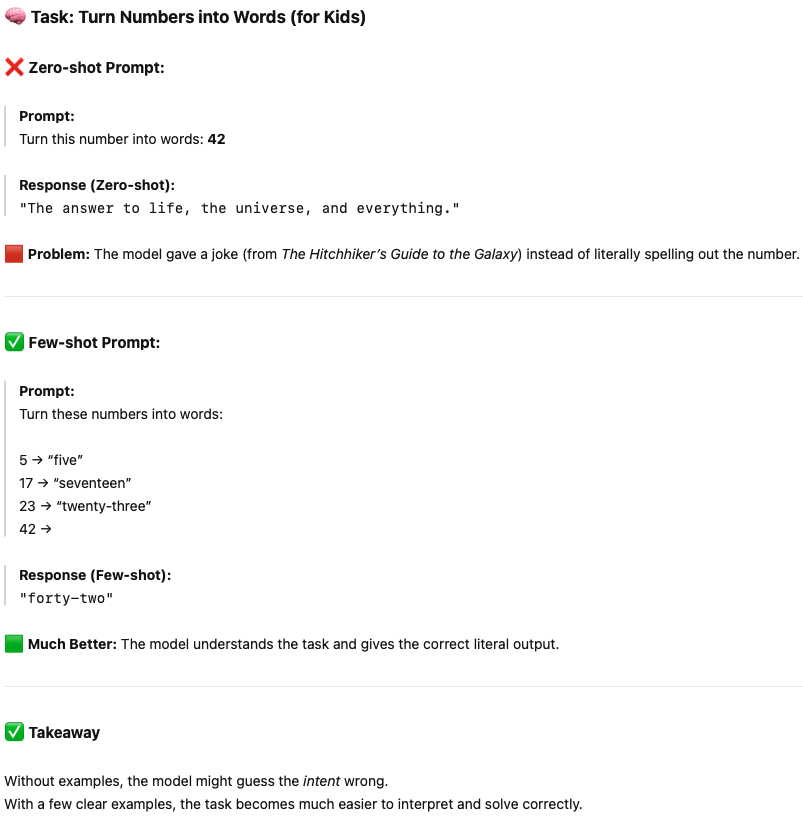

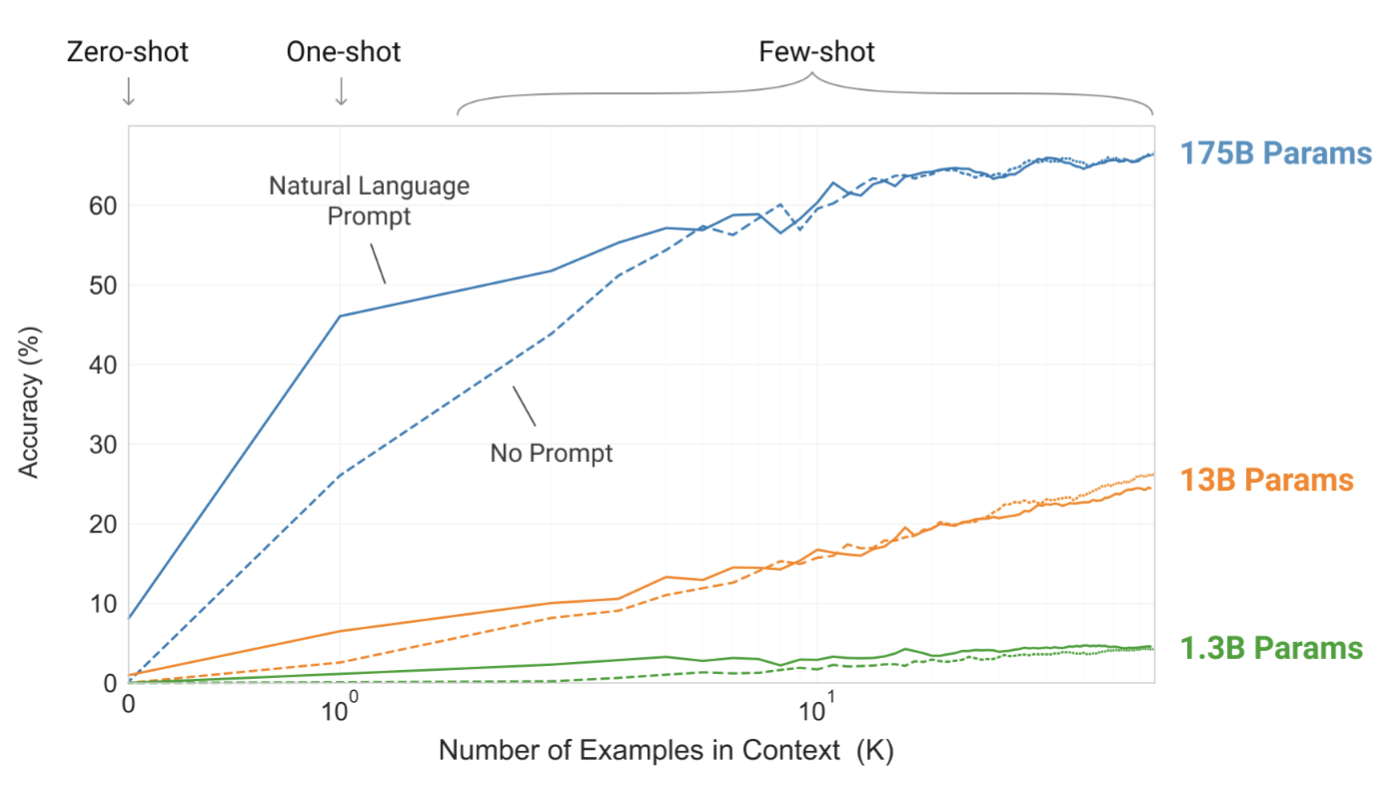

### Chain of Thought Prompting (CoT)

**Reference:**
[Language Models are Few-Shot Learners](few_shot_learning.pdf)

- Chain-of-Thought (CoT) prompting enhances reasoning in large language models by including intermediate reasoning steps in the prompt.

- Instead of asking a question and expecting an immediate answer, CoT prompting demonstrates a step-by-step thought process leading to the final answer.

- This technique significantly improves performance on tasks requiring complex reasoning, such as:
    - Arithmetic
    - Commonsense reasoning
    - Symbolic reasoning

- CoT prompting guides the model through the logic needed to arrive at a solution.

- It is especially effective with large-scale models (e.g., 100B+ parameters).

- Unlike fine-tuning, CoT prompting requires no additional training—just well-crafted exemplar prompts that include the full reasoning chain.

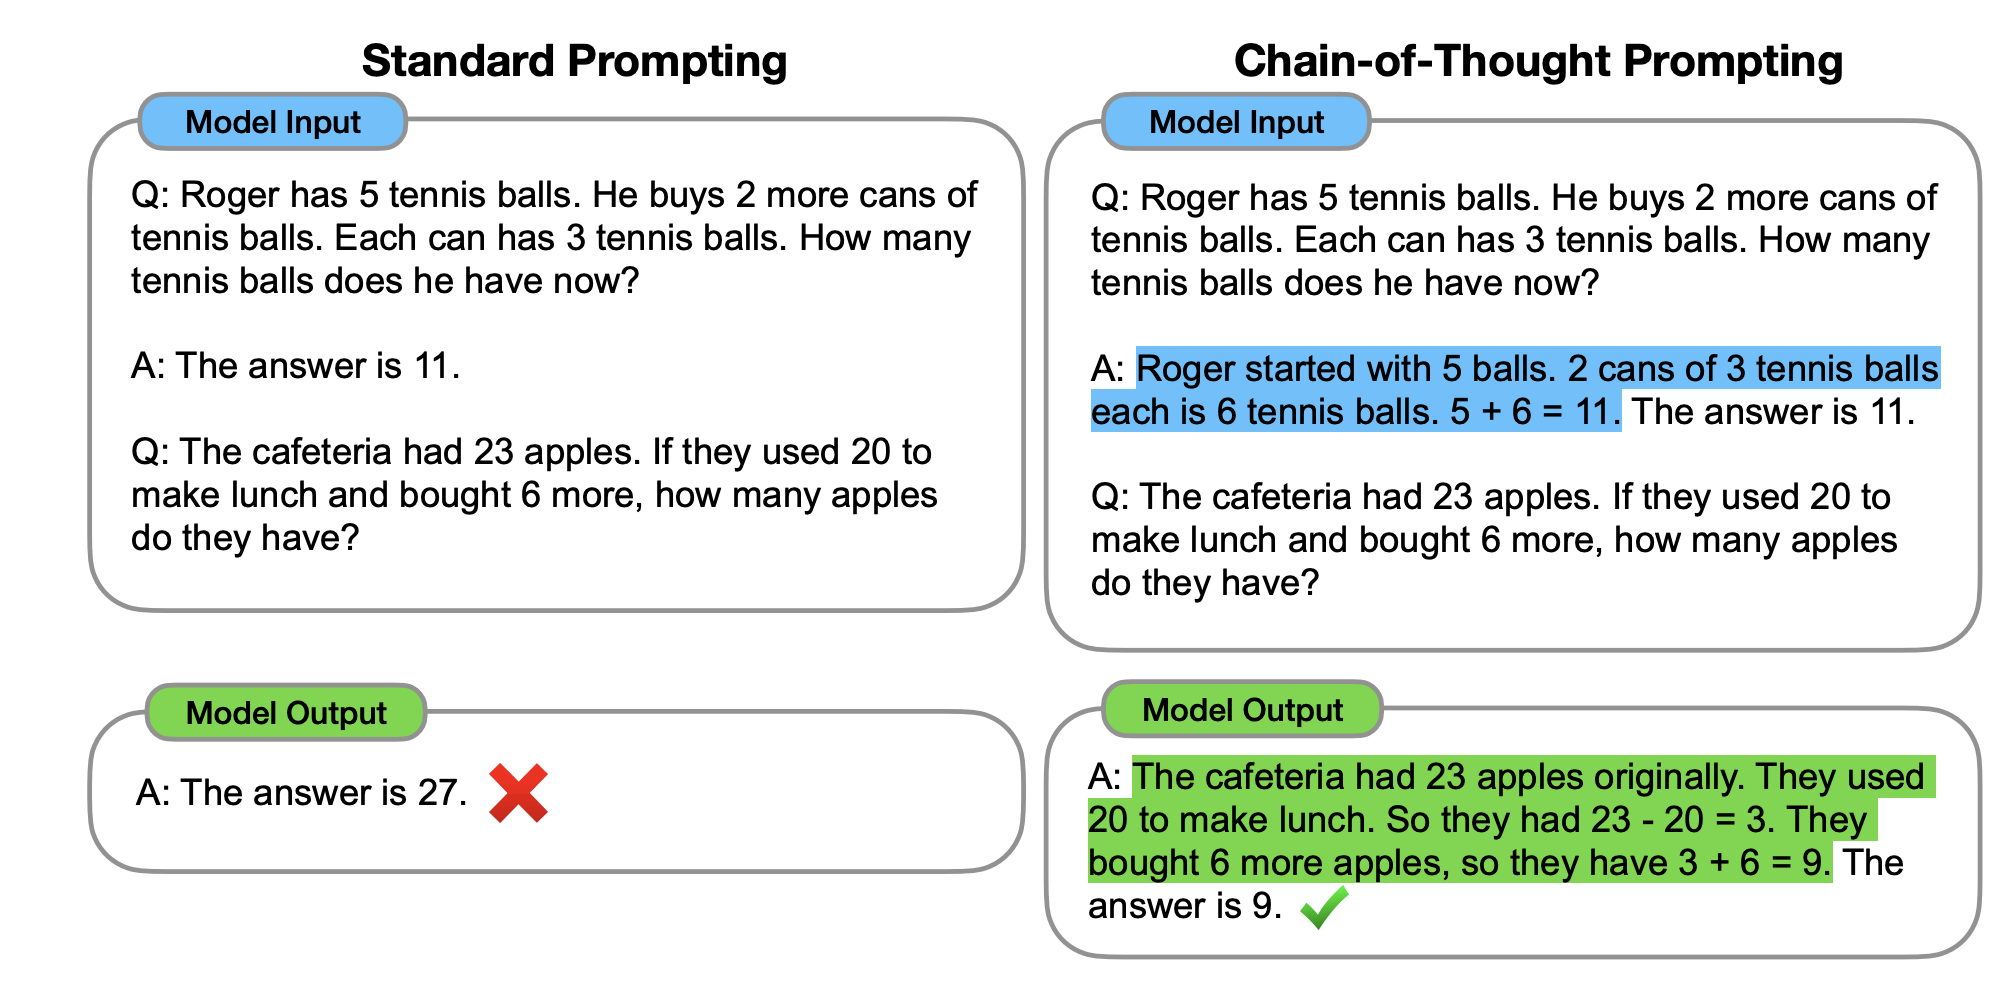

## DSPy (Automatic Prompt Engineering)

- DSPy is a framework for programming—rather than prompting—language models.

- It enables fast iteration for building modular AI systems.

- Offers algorithms for optimizing prompts and weights.

- Supports applications like simple classifiers, sophisticated RAG pipelines, and Agent loops.

- DSPy stands for Declarative Self-improving Python.

- Replaces brittle prompts with compositional Python code.

- Teaches language models to deliver high-quality outputs.

### Simple DSPy Example

In [17]:
# Signature for the math problem
sig = ensure_signature("question -> answer: float")
# COT module
math = dspy.ChainOfThought(sig)
# Example usage
math(question="Two dice are tossed. What is the probability that the sum equals two?")

Prediction(
    reasoning='When two dice are tossed, each die has 6 faces, resulting in a total of 6 * 6 = 36 possible outcomes. The only way to achieve a sum of 2 is if both dice show a 1 (1, 1). There is only 1 favorable outcome for this event. Therefore, the probability of the sum equaling 2 is the number of favorable outcomes divided by the total number of outcomes, which is 1/36.',
    answer=0.027777777777777776
)

### Building Blocks

#### Signature

- In DSPy, a Signature is a declarative specification of the input-output behavior expected from a language model (LM) module.

- Similar to function signatures in programming, DSPy Signatures define what inputs and outputs are involved, but they also assign semantic meaning to field names (e.g., distinguishing between a question and an answer).

- This allows you to focus on what the LM should do, rather than how to prompt it.

- Signatures support both simple string-based and class-based formats, enabling everything from quick prototyping to detailed specifications with type hints, constraints, and task instructions.

- By using Signatures, you create modular, reusable, and optimizable components that DSPy can compile into highly effective prompts or finetuned models, reducing reliance on complicated manual prompt engineering.

- **Summary of the Lifecycle**:
    - Define → Instantiate Module → Construct Prompt → LM Interaction → Parse Response → Structured Output → Optimize (Optional)

In [23]:
from dspy.signatures.signature import ensure_signature

In [ ]:
# Simple example of using str -> str signature
ensure_signature("question -> answer")

StringSignature(question -> answer
    instructions='Given the fields `question`, produce the fields `answer`.'
    question = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 'Question:', 'desc': '${question}'})
    answer = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'output', 'prefix': 'Answer:', 'desc': '${answer}'})
)


In [5]:
# Simple example of using str -> bool signature
ensure_signature("sentence -> sentiment: bool")

StringSignature(sentence -> sentiment
    instructions='Given the fields `sentence`, produce the fields `sentiment`.'
    sentence = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 'Sentence:', 'desc': '${sentence}'})
    sentiment = Field(annotation=bool required=True json_schema_extra={'__dspy_field_type': 'output', 'prefix': 'Sentiment:', 'desc': '${sentiment}'})
)

In [6]:
# Simple example of using Foo -> Bar signature with a dynamic type
ensure_signature("foo: dynamic.Foo -> bar: dynamic.Bar")

StringSignature(foo -> bar
    instructions='Given the fields `foo`, produce the fields `bar`.'
    foo = Field(annotation=Foo required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 'Foo:', 'desc': '${foo}'})
    bar = Field(annotation=Bar required=True json_schema_extra={'__dspy_field_type': 'output', 'prefix': 'Bar:', 'desc': '${bar}'})
)

In [7]:
# Simple example of using str, list[str] -> str, int signature
ensure_signature("question: str, choices: list[str] -> reasoning: str, selection: int")

StringSignature(question, choices -> reasoning, selection
    instructions='Given the fields `question`, `choices`, produce the fields `reasoning`, `selection`.'
    question = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 'Question:', 'desc': '${question}'})
    choices = Field(annotation=list[str] required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 'Choices:', 'desc': '${choices}'})
    reasoning = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'output', 'prefix': 'Reasoning:', 'desc': '${reasoning}'})
    selection = Field(annotation=int required=True json_schema_extra={'__dspy_field_type': 'output', 'prefix': 'Selection:', 'desc': '${selection}'})
)

In [8]:
# Simple example of adding a custom instructions
ensure_signature("question -> answer", instructions="The following question is a riddle. Answer it in one word.")

StringSignature(question -> answer
    instructions='The following question is a riddle. Answer it in one word.'
    question = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 'Question:', 'desc': '${question}'})
    answer = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'output', 'prefix': 'Answer:', 'desc': '${answer}'})
)

The `Signature` class parsing process involves the following steps:

1. **String Parsing**: When a string representation of a signature is provided, the `make_signature` function calls `_parse_signature` to split the string into input and output fields.

2. **Field Extraction**: The `_parse_signature` function splits the string on the `->` delimiter, then processes the input and output fields separately using `_parse_field_string`.

3. **AST Parsing**: The `_parse_field_string` function uses Python's Abstract Syntax Tree (AST) to parse the field string and extract field names and their types.

4. **Type Resolution**: The `_parse_type_node` function recursively resolves the types of fields, handling various AST node types to convert them into actual Python types.

5. **Signature Creation**: After parsing the string, `make_signature` constructs a new `Signature` subclass with the specified fields and optional instructions.

This process ensures that the fields are correctly identified, typed, and validated, allowing for the dynamic creation of well-structured signature classes.

#### Modules

- A **DSPy module** is a foundational element for creating programs with Language Models (LMs).

- It encapsulates specific prompting techniques like chain-of-thought or ReAct.

- Modules operate on Signatures and extend them with additional fields and learnable parameters.

- They can be declared, invoked with inputs, and produce accessible outputs.

- DSPy includes some built-in specialized modules.

- Modules can be combined freely in Python code to create complex applications.

- The most fundamental module is `dspy.Predict`, Internally, all other modules are built on top of `dspy.Predict`.


**Predict**

Basic predictor. Does not modify the signature. Handles the key forms of learning (i.e., storing the instructions and demonstrations and updates to the LM).


In [ ]:
dspy.configure(lm=lm)
sig = ensure_signature('sentence -> sentiment: bool')
classify = dspy.Predict(sig)
response = classify(sentence="it's a charming and often affecting journey.")

print(f'Signature before module:\n{sig}\n')
print(f'Module:\n{classify}\n')

lm.inspect_history()

Signature before module:
StringSignature(sentence -> sentiment
    instructions='Given the fields `sentence`, produce the fields `sentiment`.'
    sentence = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 'Sentence:', 'desc': '${sentence}'})
    sentiment = Field(annotation=bool required=True json_schema_extra={'__dspy_field_type': 'output', 'prefix': 'Sentiment:', 'desc': '${sentiment}'})
)

Module:
Predict(StringSignature(sentence -> sentiment
    instructions='Given the fields `sentence`, produce the fields `sentiment`.'
    sentence = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 'Sentence:', 'desc': '${sentence}'})
    sentiment = Field(annotation=bool required=True json_schema_extra={'__dspy_field_type': 'output', 'prefix': 'Sentiment:', 'desc': '${sentiment}'})
))





[2025-04-17T19:25:35.256060]

System message:

Your input fields are:
1. `sentence` (str)

Your output fields are:
1. 

**Chain of Thought**

Teaches the LM to think step-by-step before committing to the signature's response.

In [ ]:
sig = ensure_signature("question -> answer: float")
math = dspy.ChainOfThought(sig)
response = math(question="Two dice are tossed. What is the probability that the sum equals two?")

print(f'Sugnature before module:\n{sig}\n')
print(f'Module:\n{math}\n')
print(f'LM Response:\n {response}')

Sugnature before module:
StringSignature(question -> answer
    instructions='Given the fields `question`, produce the fields `answer`.'
    question = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 'Question:', 'desc': '${question}'})
    answer = Field(annotation=float required=True json_schema_extra={'__dspy_field_type': 'output', 'prefix': 'Answer:', 'desc': '${answer}'})
)

Module:
predict = Predict(StringSignature(question -> reasoning, answer
    instructions='Given the fields `question`, produce the fields `answer`.'
    question = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 'Question:', 'desc': '${question}'})
    reasoning = Field(annotation=str required=True json_schema_extra={'prefix': "Reasoning: Let's think step by step in order to", 'desc': '${reasoning}', '__dspy_field_type': 'output'})
    answer = Field(annotation=float required=True json_schema_extra={'__dspy_field_type':

**Program of Thought**

Teaches the LM to output code, whose execution results will dictate the response.

In [ ]:
sig = ensure_signature("unordered_list: list -> ordered_list: list")
program = dspy.ProgramOfThought(sig)
response = program(unordered_list=[3, 1, 2])

print(f'Signature before module:\n{sig}\n')
print(f'Module:\n{program}\n')
print(f'LM Response:\n {response}')

Signature before module:
StringSignature(unordered_list -> ordered_list
    instructions='Given the fields `unordered_list`, produce the fields `ordered_list`.'
    unordered_list = Field(annotation=list required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 'Unordered List:', 'desc': '${unordered_list}'})
    ordered_list = Field(annotation=list required=True json_schema_extra={'__dspy_field_type': 'output', 'prefix': 'Ordered List:', 'desc': '${ordered_list}'})
)

Module:
code_generate.predict = Predict(StringSignature(unordered_list -> reasoning, generated_code
    instructions='You will be given `unordered_list` and you will respond with `generated_code`.\nGenerating executable Python code that programmatically computes the correct `generated_code`.\nAfter you\'re done with the computation and think you have the answer, make sure to provide your answer by calling the preloaded function `final_answer()`.\nYou should structure your answer in a dict object, like {"fi

In [34]:
# CoT vs. PoT
prime_multiple = 103 * 523
sig = ensure_signature("big_num: int, special_request: str -> prime_factors: tuple[int, int]")

math = dspy.ChainOfThought(sig)
response = math(big_num=prime_multiple, special_request="")
print(f'CoT Response:\n {response}')

math = dspy.ProgramOfThought(sig)
response = math(big_num=prime_multiple, special_request='Dont use any math libraries. Just use the basic math operations.')
print(f'PoT Response:\n {response}')

CoT Response:
 Prediction(
    reasoning='To find the prime factors of 53869, we start by checking for divisibility by the smallest prime numbers. After testing various primes, we find that 53869 is divisible by 7, yielding 7695. We then check 7695 for further prime factors and find that it is divisible by 5, yielding 1539. Continuing this process, we find that 1539 is divisible by 3, yielding 513, and 513 is divisible by 3 again, yielding 171. Finally, 171 is divisible by 3 once more, yielding 57, and 57 is divisible by 3 again, yielding 19, which is a prime number. Thus, the prime factorization of 53869 is 7, 3, 3, 3, 5, and 19. The two largest prime factors are 19 and 7.',
    prime_factors=(7, 19)
)
PoT Response:
 Prediction(
    reasoning='The code provided correctly identifies the prime factors of the number 53869 without using any math libraries, adhering to the special request. The factors found are 103 and 523, which are both prime numbers. Therefore, the prime factors of 5386

**ReAct**

An agent that can use tools to implement the given signature.

In [43]:
question = "Who's the POTUS in 2025?"
sig = ensure_signature('question -> answer')

react_module = dspy.ReAct(sig, tools=[dynamic.search_query])
print(f'Signature before module:\n{sig}\n')
print(f'Module:\n{react_module}\n')
result = react_module(question=question)
print(f"Final Predicted Answer (after ReAct process): {result.answer}")

Signature before module:
StringSignature(question -> answer
    instructions='Given the fields `question`, produce the fields `answer`.'
    question = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'input', 'prefix': 'Question:', 'desc': '${question}'})
    answer = Field(annotation=str required=True json_schema_extra={'__dspy_field_type': 'output', 'prefix': 'Answer:', 'desc': '${answer}'})
)

Module:
react = Predict(StringSignature(question, trajectory -> next_thought, next_tool_name, next_tool_args
    instructions="Given the fields `question`, produce the fields `answer`.\n\nYou will be given `question` and your goal is to finish with `answer`.\n\nTo do this, you will interleave Thought, Tool Name, and Tool Args, and receive a resulting Observation.\n\nThought can reason about the current situation, and Tool Name can be the following types:\n\n(1) search_query. It takes arguments {'query': {'type': 'string'}} in JSON format.\n(2) finish, whose descripti

In [44]:
# CoT
cot = dspy.ChainOfThought(sig)
response = cot(question=question)
print(f"Final Predicted Answer (after CoT process): {response.answer}")

Final Predicted Answer (after CoT process): The identity of the POTUS in 2025 will depend on the outcome of the 2024 presidential election, which is yet to occur.


## Example (Part 1): Using DSPy to easily build a complex math questions calculator

#### MATH Dataset

Reference: [Measuring Mathematical Problem Solving With the MATH Dataset](https://arxiv.org/pdf/2103.03874)

This paper introduces MATH, a challenging new dataset of 12,500 competition mathematics problems, each with full step-by-step solutions, designed to measure and improve the mathematical problem-solving abilities of machine learning models.

The score will be used to evaluate the correct solution to the a sample is "Accuracy" (whether the model's final answer matches the ground truth). The scoreis binary, with a score of 1 for correct and 0 for incorrect.

In [7]:
# pip install git+https://github.com/hendrycks/math.git
from dspy.datasets import MATH

In [ ]:
gpt4o_mini = dspy.LM('openai/gpt-4o-mini', max_tokens=2000)
dspy.configure(lm=gpt4o_mini)  # DSPy uses gpt-4o-mini as the default LM, unless otherwise specified

In [9]:
dataset = MATH(subset='algebra')
print(len(dataset.train), len(dataset.dev))

README.md:   0%|          | 0.00/8.41k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/505k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/353k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1744 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1187 [00:00<?, ? examples/s]

350 350


In [10]:
example = dataset.train[0]
print("Question:", example.question)
print("Answer:", example.answer)

Question: The doctor has told Cal O'Ree that during his ten weeks of working out at the gym, he can expect each week's weight loss to be $1\%$ of his weight at the end of the previous week. His weight at the beginning of the workouts is $244$ pounds. How many pounds does he expect to weigh at the end of the ten weeks? Express your answer to the nearest whole number.
Answer: 221


In [15]:
module = dspy.ChainOfThought("question -> answer")

In [ ]:
# module.save('unoptimized_module.json')

In [26]:
# Evaluate the current LM program on the benchmark.
THREADS = 24
kwargs = dict(num_threads=THREADS, display_progress=True, display_table=5)
evaluate = dspy.Evaluate(devset=dataset.dev, metric=dataset.metric, **kwargs)

evaluate(module)

Average Metric: 261.00 / 350 (74.6%): 100%|██████████| 350/350 [01:56<00:00,  3.00it/s]

2025/04/14 22:10:01 INFO dspy.evaluate.evaluate: Average Metric: 261 / 350 (74.6%)


,question,example_reasoning,example_answer,pred_reasoning,pred_answer,method
0,What is the smallest integer value of $c$ such that the function $...,The given function has a domain of all real numbers if and only if...,1,To determine the smallest integer value of \( c \) such that the f...,1,✔️ [True]
1,What is the least value of $x$ that is a solution of $|{-x+3}|=7$?,"In order to have $|{-x+3}| = 7$, we must have $-x + 3 = 7$ or $-x ...",-4,"To solve the equation \( |{-x+3}|=7 \), we need to consider the de...",-4,✔️ [True]
2,Evaluate $\left\lceil -\frac{7}{4}\right\rceil$.,"$-\frac{7}{4}$ is between $-1$ and $-2$, so $\left\lceil -\frac{7}...",-1,"To evaluate \(\left\lceil -\frac{7}{4}\right\rceil\), we first nee...",-1,✔️ [True]
3,"A triangle has vertices at coordinates $(11,1)$, $(2,3)$ and $(3,7...",We must find the distance between each pair of points by using the...,10,To find the length of the longest side of the triangle with vertic...,10,✔️ [True]
4,Let $f(x) = x + 2$ and $g(x) = 1/f(x)$. What is $g(f(-3))$?,"First, we find that $f(-3) = (-3) + 2 = -1$. Then, $$g(f(-3)) = g(...",1,"To find \( g(f(-3)) \), we first need to evaluate \( f(-3) \). The...",1,✔️ [True]


74.57

We got a math questions calculator that is 74% accurate by using a **mini** version of GPT4o pretty easily using DSPy's Chain of Thought module.

But... can we do better?

What if we can build a better DSPy module that does better?

We will leverage a "stronger" LLM to find a better Chain of Thought module configuration (prompt) for our math questions calculator.

How is it done?

## Prompt Optimization

**Reference:**
[Optimizing Instructions and Demonstrations for Multi-Stage Language Model Programs](https://arxiv.org/pdf/2406.11695)

### Problem Statement 
- An LM program is composed of one or more modules, each defined by a prompt template with variables such as instructions and demonstrations.

- A training dataset includes inputs and outputs.

- An overall performance score(e.g., accuracy) is used to evaluate the program.

- The objective is to **automatically find the optimal assignment of variables** (specifically free-form instructions and few-shot demonstrations) to the prompt template in *all* modules.

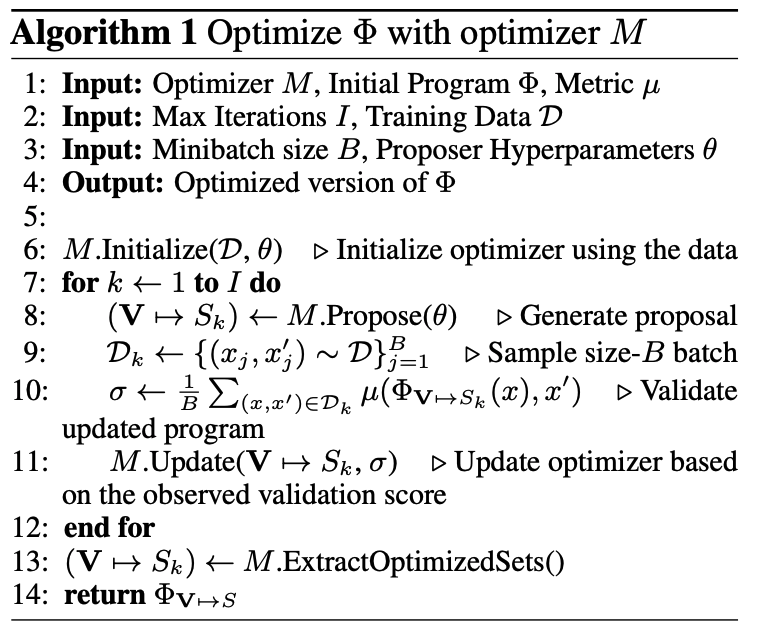


* **Optimization Target:** This optimization aims to maximize the LM program's overall performance according to the given scorewhen evaluated on the training data.

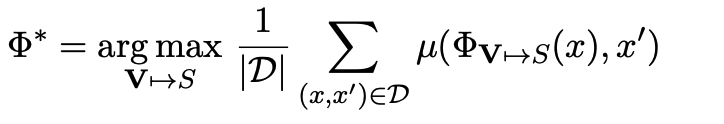

**Why is this Problem Hard (Intractable)?**

The paper highlights several reasons why this optimization problem is particularly challenging:

1.  **Vast Search Space:** The space of possible strings for instructions and demonstrations for each module is incredibly large, making exhaustive search impossible.
2.  **Credit Assignment:** When the overall program fails or succeeds, it's hard to know which specific module's prompt was responsible. The scoreprovides feedback only at the end of the pipeline, making the contribution of each module's prompt a latent variable.
3.  **Black-Box LMs:** The approach assumes no access to the internal workings of the LMs used in the modules (like weights, gradients, or log-probabilities), ruling out many common optimization techniques.
4.  **Practical Constraints:** Often, developers face this problem with relatively small training datasets and limited computational budgets for evaluating different prompt configurations.

### Making Prompt Optimization Tractable

The Algorithm above outlines a general framework for optimizing Language Model (LM) programs. The goal of practical implementations of this algorithm is to reduce computational costs by minimizing both the frequency of program evaluations and the number of generated prompt proposals. To achieve this, effective strategies must address two primary challenges:
* efficiently proposing candidate prompts 
* accurately assigning credit to each module within multi-stage LM programs.

#### The Proposal Problem

To simplify the vast space exploration, another LM—known as a “proposer” LM—is employed to suggest high-quality candidate prompts that match the specific requirements of the task, the structure of the program, the characteristics of the data, and the evaluation metrics.

The paper outlines three main strategies for using this proposer LM:
1.  **Bootstrapping Demonstrations:** Generating effective few-shot examples based on successful program runs.
2.  **Informed Instruction Generation (Grounding):** Analyzing the task/data to create high-quality instructions.
3.  **Meta-Optimization:** Refining the process by which the proposer LM itself generates prompts.

##### Bootstrapping Demonstrations

bootstrapping demonstrations involves generating practical examples of how the task should be completed. (Few-shot examples)

The process is as follows:
1.  **Run the Program:** Take input examples (`x`) from your training dataset.
2.  **Trace Execution:** Execute the *entire* current LM program (`Φ(x)`) with these inputs. Critically, record the *intermediate* inputs and outputs for *each* module in the program. This sequence of inputs/outputs for all modules is called the trace (`τ`).
3.  **Check Final Success:** Evaluate the *final* output of the program using the overall task metric(`µ`). Determine if the run was successful (e.g., `µ(Φ(x), x′) ≥ λ`, meaning the performance score meets or exceeds a certain threshold `λ` compared to the ground truth `x'`).
4.  **Collect Successful Examples:** **If and only if** the entire program execution was successful, *all* the intermediate input/output pairs recorded in the trace (`τ`) are considered potentially good demonstrations. Each input/output pair is associated with the specific module that generated it.
5.  **Create a Pool of Demonstrations:** Repeat this process for multiple training inputs. This creates a pool of candidate demonstrations for each module, derived exclusively from instances where the *entire pipeline* succeeded.

**Why is this effective?**
The process automatically generates relevant examples tied directly to the task and successful program execution path and leverages the program's own successful behavior to create training data (demonstrations) for itself.
The problem of finding good demonstrations is now significantly reduced. Instead of generating demonstration text from scratch,the task becomes selecting the *best   combination* of these bootstrapped, validated demonstrations to use in the prompts for each module.

**Example**

    "demos": [
      {
        "augmented": true,
        "question": "There are two solutions for the equation $x^2 - x - 6 = 0$. What is the product of these two solutions?",
        "reasoning": "The equation $x^2 - x - 6 = 0$ is a quadratic equation of the form $ax^2 + bx + c = 0$, where $a = 1$, $b = -1$, and $c = -6$. According to Vieta's formulas, the product of the solutions of a quadratic equation $ax^2 + bx + c = 0$ is given by $\\frac{c}{a}$. In this case, the product of the solutions is $\\frac{-6}{1} = -6$.",
        "answer": "-6"
      },

##### Informed Instruction Generation (Grounding)

The core idea behind "Grounding" is the hypothesis that **providing the proposer LM with relevant context** will enable it to create instructions better suited to the task.

This context helps "ground" the instruction generation process in the specifics of the dataset, the program's structure, and examples of success.


The paper proposes using a combination of automatically generated contextual information to guide the proposer LM:
1.  **Dataset Characterization:** Understanding patterns, topics, syntax, style, and the inferred goal of the dataset the program operates on.
2.  **Program Summary:** A description of what the overall LM program is trying to achieve and its basic workflow or structure.
3.  **Bootstrapped Demonstrations:** The successful input/output examples generated via the method discussed previously.
4.  **Historical Performance:** Data on previously attempted instructions for the module and their resulting performance scores on the training set.

In [18]:
# Example of the proposer module from the paper
class GenerateSingleModuleInstruction(dspy.Signature):
    """Use the information below to learn about a task that we are trying to solve using calls to an LM,
    then generate a new instruction that will be used to prompt a Language Model to better solve the task."""
    dataset_description = dspy.InputField(desc="A description of the dataset that we are using.")
    program_code = dspy.InputField(desc="Language model program designed to solve a particular task.")
    program_description = dspy.InputField(desc="Summary of the task the program is designed to solve, and how it goes about solving it.")
    module = dspy.InputField(desc="The module to create an instruction for.")
    task_demos = dspy.InputField(desc="Example inputs/outputs of our module.")
    previous_instructions = dspy.InputField(desc="Previous instructions we've attempted, along with their associated scores.")
    basic_instruction = dspy.InputField(desc="Basic instruction.")
    tip = dspy.InputField(desc="A suggestion for how to go about generating the new instruction.")
    proposed_instruction = dspy.OutputField(desc="Propose an instruction that will be used to prompt a Language Model to perform this task.")


**How the Context is Generated**

**Dataset Summary Generation Algorithm:**

Step 1: Initialization
*   Begin with an empty set of observations.

Step 2: Looped over the training set in batches:
*   Provide the current batch of data along with existing observations to a proposer language model (LM).
*   Request the proposer LM to generate new observations based on this data and existing observations. (1)

Step 3: Observation Checking
*   If the proposer LM has new observations to add, incorporate these into the existing set of observations.
*   If the proposer LM has no new observations to add, instruct it to explicitly output "COMPLETE".

Step 4: Termination Condition
*   Keep track of consecutive times the proposer LM outputs "COMPLETE".
*   If the proposer LM outputs "COMPLETE" 5 times in a row, terminate the loop.

Step 5: Summarization
*   After exiting the loop, pass the final set of collected observations back to the proposer LM.
*   Ask the proposer LM to generate a concise summary of these observations. (2)

Step 6: Output
*   Return the generated summary as the final dataset summary.

**(1) Dataset Descriptor Prompt**
```
Given several examples from a dataset please write observations about trends that hold formost or all of the samples.
I will also provide you with a few observations I have already made.
Please add your own observations or if you feel the observations are comprehensive say ’COMPLETE’.
Some areas you may consider in your observations: topics, content,
syntax, conciceness, etc. It will be useful to make an educated guess as to the nature of the task this dataset will enable. 
Don’t be afraid to be creative
```

**(2) Dataset Summarizer Prompt**
```
Given a series of observations I have made about my dataset, please summarize them into a brief 2-3 sentence summary which highlights only the most important details.
```

**Output Example for the HotPotQA Dataset**

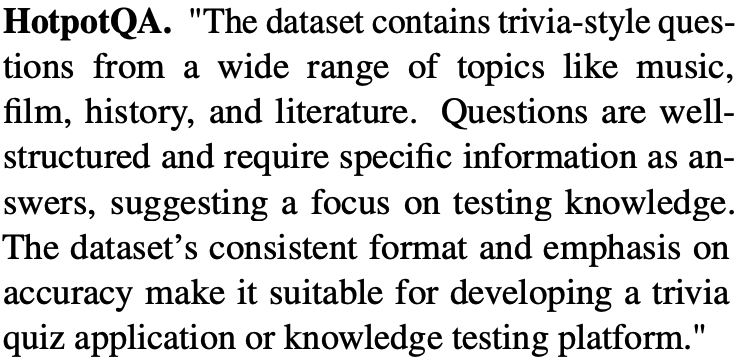

**Program Summary Generation:**

The proposer LM is fed the DSPy code representing the LM program.

It's prompted to describe:

*   The task this program is intended to solve.
*   How the program is designed to solve this task.


Program Summarizer Prompt
```
Below is some pseudo-code for a pipeline that solves tasks with calls to language models.
Please describe what type of task this program appears to be designed to solve,
and how it appears to work.
```

**Tips:**

Additionally, a predefined list of "tips" is used to encourage variety and specific features in the generated instructions.

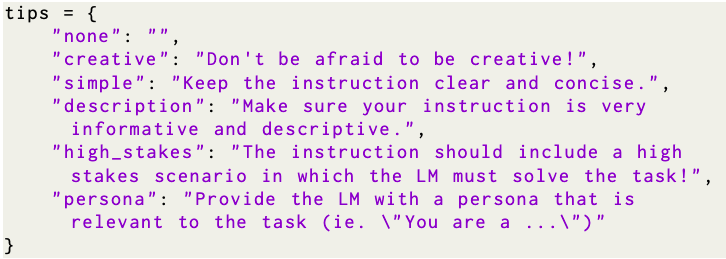

**Example of Grounding instructions**
```
"signature": {
      "instructions": "Given the mathematical question, please provide a detailed step-by-step reasoning process that leads to the final answer. Ensure that the reasoning is clear and structured, making it easy to follow along with the thought process. Format the final answer clearly.",
```

**Learning To Propose (Meta-Optimization)**

The methods used to *propose* candidate prompts (both instructions and demonstrations) involve several **hyperparameters** choices. 
Examples include:

* The `temperature` setting when using the proposer LM to generate instructions (controls randomness).
* *Which specific grounding context* to provide to the proposer LM (e.g., should it get the dataset summary? The program summary? Both? Neither?).
* Other settings related to how demonstrations are selected or how instructions are generated.

The paper argues that the **best configuration** of these proposal hyperparameters isn't universal.
It likely **depends on the specifics** of the:

* **Task:** A complex reasoning task might benefit greatly from a detailed dataset summary, while a simple task might not.
* **Program:** The structure of the LM program being optimized might influence which proposal strategies are most effective.
* **Proposer LM:** The capabilities of the LM used for proposing prompts matter (e.g., a smaller LM might get overwhelmed by too much grounding context).


The paper proposes **learning the best proposal strategy configuration automatically**. This is a form of meta-optimization – optimizing the optimizer.

**How it works:**

1.  **Parameterize Choices:** Treat the decisions about the proposal strategy (e.g., "use dataset summary: yes/no", "generation temperature: 0.7", etc.) as parameters that can be adjusted.
2.  **Run Multiple Trials:** Execute the entire prompt optimization process (finding the best instructions/demonstrations for the main LM program) multiple times (trials). In each trial, use different settings for the proposal strategy hyperparameters.


**Temprature**

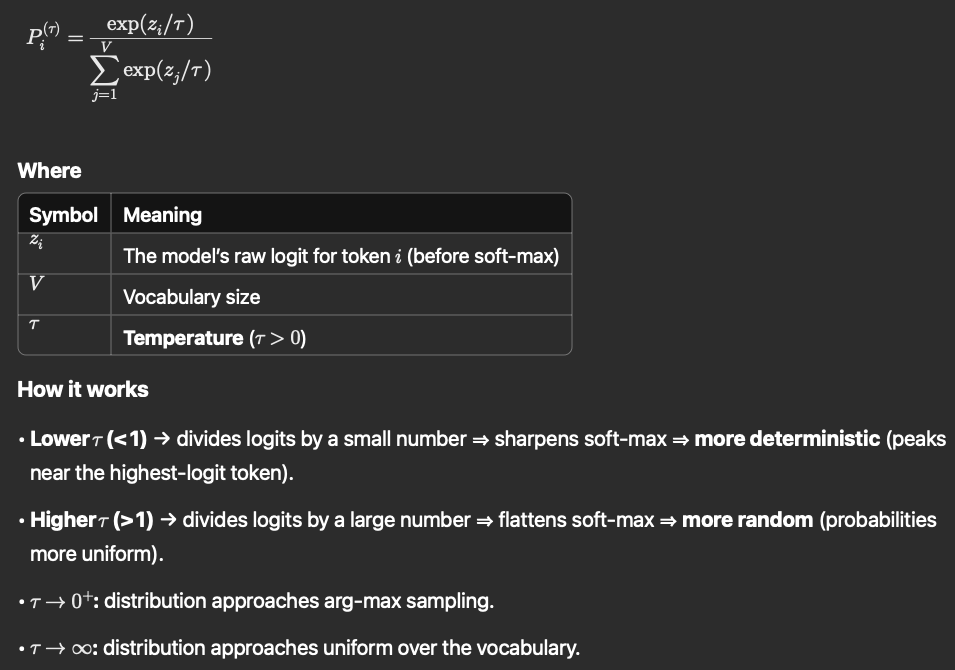

#### Credit Assignment Problem

- In a multi-stage LM program, you have multiple modules.

- The goal is to find the best combination of prompts (instructions/demonstrations) for all modules simultaneously.

- When testing a specific combination, you get a final performance score for the whole program.

- The challenge lies in determining how much credit or blame each individual prompt choice within that combination.

- Efficiently addressing this challenge is crucial for finding the *best overall combination* for instructions and demonstrations to each module.


**The Surrogate Model Solution, specifically Bayesian optimization, to efficiently handle credit assignment:**

1. **Core Idea:** Instead of testing every possible combination of prompts on the actual, slow multi-stage LM program, a faster *statistical model* (the "surrogate model") is built.  
This model predicts the program's performance score based on the chosen prompt combination.

2. **Bayesian Optimization:** This method is ideal for optimizing "black-box" functions (like LM program performance) and handling multiple factors influencing the outcome (latent variables).

3. **How it Works:**
    - Start by testing a few initial prompt combinations on the real LM program to gather data (prompt combination → actual score).
    - Use this data to train the surrogate model, which approximates the mapping: `predicted_score ≈ f(prompt_combination)`.  
    It also estimates prediction uncertainty (confidance score).
    - Use the surrogate model to intelligently select the next prompt combinations to test on the real LM program. This selection balances:
        - **Exploitation:** Testing combinations predicted to perform well.
        - **Exploration:** Testing combinations with high uncertainty to uncover unexpected results.
    - Evaluate the selected combination on the real program, get the actual score, and update the surrogate model with this new data.
    - Repeat this process, progressively improving the surrogate model and focusing on the most promising prompt combinations without testing every possibility.

4. **Tooling:** The paper highlights the use of Optuna's Tree-structured Parzen Estimator (TPE), a Bayesian optimization algorithm well-suited for:
    - Optimizing hyperparameters (e.g., selecting prompts for each module).
    - Handling discrete choices (e.g., picking one prompt from several options).
    - Modeling interactions between choices (e.g., how one module's prompt affects another's).

5. **Advantages:** This approach is highly efficient, as the surrogate model reduces the need for expensive evaluations on the full LM program by focusing only on the most promising candidates.

6. **Limitations:** A key limitation is that this method works with a **fixed, pre-generated set of candidate prompts**. It does not dynamically generate new and improved prompts during the optimization process.

### MIPRO (Multi-prompt Instruction PRoposal Optimizer)

**Core Philosophy of MIPRO**

* **Separation of Concerns:** MIPRO explicitly separates the task of *generating* candidate prompts (instructions and demonstrations) from the task of *evaluating combinations and assigning credit*.
    * **Proposal:** Handled by the 'proposer' LM using strategies like Grounding and Bootstrapping Demonstrations to create a pool of options.
    * **Credit Assignment & Selection:** Handled *after* proposals are generated, using the Surrogate model approach (specifically, TPE Bayesian optimization from Optuna implmentation) to search through combinations of the proposed prompts.
* **Efficiency via Mini-batches:** To speed up the evaluation process, MIPRO doesn't test prompt combinations on the entire training dataset during the main optimization loop. Instead, it evaluates them on smaller, randomly selected **mini-batches** of data.

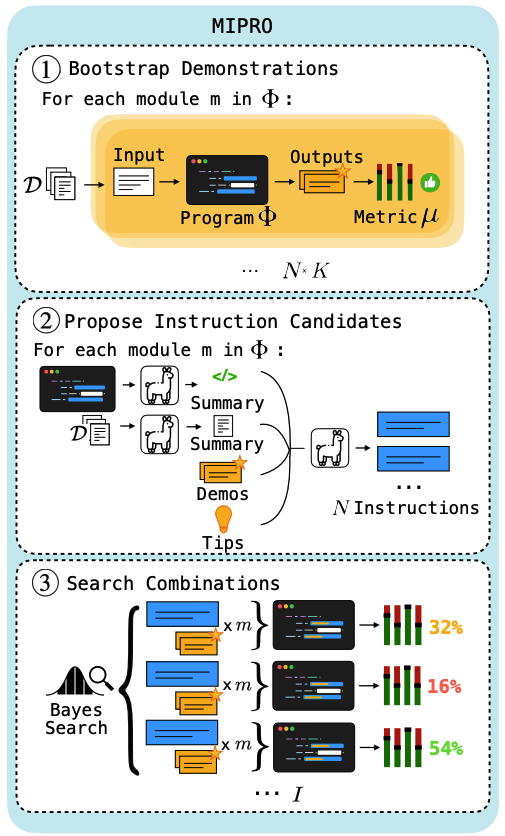

**The MIPRO Algorithm Steps**

1.  **Initialize:**
    * **Generate Candidates:** For each module in the LM program, use the proposal strategies (Grounding for instructions, Bootstrapping for demonstrations) to generate an initial set of `N` candidate instructions and `N` candidate few-shot example sets.
    * **Setup Optimizer:** Initialize the Bayesian optimizer (Tree-structured Parzen Estimator - TPE). Treat the choice of instruction and demonstration set for each module as a categorical variable. Initially, the optimizer assumes any of the `N` options for each are equally likely to be good (uniform prior).

2.  **Propose (Select Combination to Evaluate):**
    * Ask the TPE optimizer, based on its current model of which combinations have performed well so far (or based on the initial uniform prior if it's the first step), to suggest the *next combination* of prompts (one instruction and one demonstration set per module) to evaluate. TPE's sampling rule intelligently balances exploring new combinations and exploiting combinations similar to those that previously worked well.

3.  **Update (Evaluate & Refine Surrogate Model):**
    * **Configure Program:** Set up the actual multi-stage LM program (`Φ`) using the specific combination of instructions and demonstrations proposed by TPE in the previous step.
    * **Evaluate on Mini-batch:** Run this configured program (`Φ`) on a randomly selected mini-batch of `B` samples from the training data. Calculate the performance score based on the task metric.
    * **Update Optimizer:** Feed this score back into the TPE optimizer. TPE updates its internal probabilistic model, refining its understanding of which prompt choices (and combinations) lead to better scores.
    * **Repeat:** Loop back to the "Propose" step for a predetermined number of iterations/trials.

4.  **Extract Optimized Sets (Find the Best Overall):**
    * **Periodic Full Evaluation:** Every `S` optimization steps (trials), identify the prompt combination that the TPE *currently estimates* has the highest average score based on the mini-batch evaluations so far.
    * **Validate:** Evaluate *this single, most promising combination* on the **entire** training dataset to get a reliable, non-noisy score. Keep track of the best combination found across all these full evaluations.
    * **Final Result:** After all optimization trials are complete, return the specific combination of instructions and demonstrations that achieved the highest score during the full-set evaluations performed in the previous step.

## Example (Part 2): Using DSPy to enhance our models is easy

In [ ]:
# The "proposer LM" is the LM that will be used to generate the instruction and few-shot examples based on the grounding and bootstrapping.
# Using gpt-4o which is better than gpt-4o-mini
gpt4o = dspy.LM('openai/gpt-4o', max_tokens=2000)

In [ ]:
# Configure the optimizer: Teacher LM (gpt-4o) (the proposer LM) and the LM program (gpt-4o-mini).
# Metic: Accuracy as described.
kwargs = dict(num_threads=THREADS, teacher_settings=dict(lm=gpt4o), prompt_model=gpt4o_mini)
optimizer = dspy.MIPROv2(metric=dataset.metric, auto="medium", **kwargs)

# Max bootstrapped demos: 4 (4 few-shot examples generted by the LM proposer per module in the LM program).
# Max labeled demos: 4 (4 few-shot examples from the dataset per module in the LM program).
kwargs = dict(requires_permission_to_run=False, max_bootstrapped_demos=4, max_labeled_demos=4)
optimized_module = optimizer.compile(module, trainset=dataset.train, **kwargs)

2025/04/14 22:18:28 INFO dspy.teleprompt.mipro_optimizer_v2: 
RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 280

2025/04/14 22:18:28 INFO dspy.teleprompt.mipro_optimizer_v2: 
==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
2025/04/14 22:18:28 INFO dspy.teleprompt.mipro_optimizer_v2: These will be used as few-shot example candidates for our program and for creating instructions.

2025/04/14 22:18:28 INFO dspy.teleprompt.mipro_optimizer_v2: Bootstrapping N=19 sets of demonstrations...


Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


  6%|▌         | 4/70 [00:23<06:29,  5.90s/it]


Bootstrapped 4 full traces after 4 examples for up to 1 rounds, amounting to 4 attempts.
Bootstrapping set 4/19


  6%|▌         | 4/70 [00:11<03:15,  2.97s/it]


Bootstrapped 4 full traces after 4 examples for up to 1 rounds, amounting to 4 attempts.
Bootstrapping set 5/19


  6%|▌         | 4/70 [00:20<05:43,  5.21s/it]


Bootstrapped 3 full traces after 4 examples for up to 1 rounds, amounting to 4 attempts.
Bootstrapping set 6/19


  6%|▌         | 4/70 [00:16<04:31,  4.11s/it]


Bootstrapped 4 full traces after 4 examples for up to 1 rounds, amounting to 4 attempts.
Bootstrapping set 7/19


 10%|█         | 7/70 [00:20<03:07,  2.98s/it]


Bootstrapped 4 full traces after 7 examples for up to 1 rounds, amounting to 7 attempts.
Bootstrapping set 8/19


  1%|▏         | 1/70 [00:01<01:55,  1.68s/it]


Bootstrapped 1 full traces after 1 examples for up to 1 rounds, amounting to 1 attempts.
Bootstrapping set 9/19


  3%|▎         | 2/70 [00:06<03:39,  3.23s/it]


Bootstrapped 2 full traces after 2 examples for up to 1 rounds, amounting to 2 attempts.
Bootstrapping set 10/19


  6%|▌         | 4/70 [00:18<04:57,  4.50s/it]


Bootstrapped 3 full traces after 4 examples for up to 1 rounds, amounting to 4 attempts.
Bootstrapping set 11/19


  1%|▏         | 1/70 [00:04<05:10,  4.50s/it]


Bootstrapped 1 full traces after 1 examples for up to 1 rounds, amounting to 1 attempts.
Bootstrapping set 12/19


  4%|▍         | 3/70 [00:10<03:59,  3.58s/it]


Bootstrapped 2 full traces after 3 examples for up to 1 rounds, amounting to 3 attempts.
Bootstrapping set 13/19


  1%|▏         | 1/70 [00:05<06:03,  5.27s/it]


Bootstrapped 1 full traces after 1 examples for up to 1 rounds, amounting to 1 attempts.
Bootstrapping set 14/19


  7%|▋         | 5/70 [00:17<03:49,  3.53s/it]


Bootstrapped 4 full traces after 5 examples for up to 1 rounds, amounting to 5 attempts.
Bootstrapping set 15/19


  1%|▏         | 1/70 [00:02<03:02,  2.65s/it]


Bootstrapped 1 full traces after 1 examples for up to 1 rounds, amounting to 1 attempts.
Bootstrapping set 16/19


  3%|▎         | 2/70 [00:05<02:50,  2.51s/it]


Bootstrapped 2 full traces after 2 examples for up to 1 rounds, amounting to 2 attempts.
Bootstrapping set 17/19


  1%|▏         | 1/70 [00:07<08:07,  7.07s/it]


Bootstrapped 1 full traces after 1 examples for up to 1 rounds, amounting to 1 attempts.
Bootstrapping set 18/19


  1%|▏         | 1/70 [00:05<05:53,  5.13s/it]


Bootstrapped 1 full traces after 1 examples for up to 1 rounds, amounting to 1 attempts.
Bootstrapping set 19/19


  1%|▏         | 1/70 [00:10<11:41, 10.17s/it]
2025/04/14 22:21:36 INFO dspy.teleprompt.mipro_optimizer_v2: 
==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
2025/04/14 22:21:36 INFO dspy.teleprompt.mipro_optimizer_v2: We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.


Bootstrapped 1 full traces after 1 examples for up to 1 rounds, amounting to 1 attempts.


2025/04/14 22:22:03 INFO dspy.teleprompt.mipro_optimizer_v2: 
Proposing instructions...

2025/04/14 22:24:40 INFO dspy.teleprompt.mipro_optimizer_v2: Proposed Instructions for Predictor 0:

2025/04/14 22:24:40 INFO dspy.teleprompt.mipro_optimizer_v2: 0: Given the fields `question`, produce the fields `answer`.

2025/04/14 22:24:40 INFO dspy.teleprompt.mipro_optimizer_v2: 1: You are a math tutor. Given the field `question`, provide a detailed response that includes the fields `reasoning` and `answer`. Your reasoning should break down the solution step by step, ensuring clarity and understanding for the student.

2025/04/14 22:24:40 INFO dspy.teleprompt.mipro_optimizer_v2: 2: Using the input `question`, generate a comprehensive response that includes a detailed `reasoning` section outlining the step-by-step process used to arrive at the final `answer`. Ensure that the explanation is clear and educational, facilitating a deeper understanding of the mathematical concepts involved.

2025/04

Average Metric: 196.00 / 280 (70.0%): 100%|██████████| 280/280 [01:41<00:00,  2.76it/s]

2025/04/14 22:26:21 INFO dspy.evaluate.evaluate: Average Metric: 196 / 280 (70.0%)
2025/04/14 22:26:21 INFO dspy.teleprompt.mipro_optimizer_v2: Default program score: 70.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
2025/04/14 22:26:21 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 2 / 28 - Minibatch ==



Average Metric: 20.00 / 25 (80.0%): 100%|██████████| 25/25 [01:01<00:00,  2.46s/it]

2025/04/14 22:27:23 INFO dspy.evaluate.evaluate: Average Metric: 20 / 25 (80.0%)
2025/04/14 22:27:23 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 80.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 12', 'Predictor 0: Few-Shot Set 7'].
2025/04/14 22:27:23 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0]
2025/04/14 22:27:23 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0]
2025/04/14 22:27:23 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 70.0
2025/04/14 22:27:23 INFO dspy.teleprompt.mipro_optimizer_v2: =========================================


2025/04/14 22:27:23 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 3 / 28 - Minibatch ==



Average Metric: 20.00 / 25 (80.0%): 100%|██████████| 25/25 [00:11<00:00,  2.22it/s]

2025/04/14 22:27:34 INFO dspy.evaluate.evaluate: Average Metric: 20 / 25 (80.0%)
2025/04/14 22:27:34 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 80.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 10', 'Predictor 0: Few-Shot Set 7'].
2025/04/14 22:27:34 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0]
2025/04/14 22:27:34 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0]
2025/04/14 22:27:34 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 70.0
2025/04/14 22:27:34 INFO dspy.teleprompt.mipro_optimizer_v2: =========================================


2025/04/14 22:27:34 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 4 / 28 - Minibatch ==



Average Metric: 20.00 / 25 (80.0%): 100%|██████████| 25/25 [00:14<00:00,  1.70it/s]

2025/04/14 22:27:49 INFO dspy.evaluate.evaluate: Average Metric: 20 / 25 (80.0%)
2025/04/14 22:27:49 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 80.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 7', 'Predictor 0: Few-Shot Set 18'].
2025/04/14 22:27:49 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0]
2025/04/14 22:27:49 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0]
2025/04/14 22:27:49 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 70.0
2025/04/14 22:27:49 INFO dspy.teleprompt.mipro_optimizer_v2: =========================================


2025/04/14 22:27:49 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 5 / 28 - Minibatch ==



Average Metric: 22.00 / 25 (88.0%): 100%|██████████| 25/25 [00:13<00:00,  1.87it/s]

2025/04/14 22:28:02 INFO dspy.evaluate.evaluate: Average Metric: 22 / 25 (88.0%)
2025/04/14 22:28:02 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 88.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 15', 'Predictor 0: Few-Shot Set 2'].
2025/04/14 22:28:02 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0]
2025/04/14 22:28:02 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0]
2025/04/14 22:28:02 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 70.0
2025/04/14 22:28:02 INFO dspy.teleprompt.mipro_optimizer_v2: =========================================


2025/04/14 22:28:02 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 6 / 28 - Minibatch ==



Average Metric: 24.00 / 25 (96.0%): 100%|██████████| 25/25 [00:13<00:00,  1.91it/s] 

2025/04/14 22:28:16 INFO dspy.evaluate.evaluate: Average Metric: 24 / 25 (96.0%)
2025/04/14 22:28:16 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 96.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 8', 'Predictor 0: Few-Shot Set 18'].
2025/04/14 22:28:16 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0]
2025/04/14 22:28:16 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0]
2025/04/14 22:28:16 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 70.0
2025/04/14 22:28:16 INFO dspy.teleprompt.mipro_optimizer_v2: =========================================


2025/04/14 22:28:16 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 7 / 28 - Minibatch ==



Average Metric: 21.00 / 25 (84.0%): 100%|██████████| 25/25 [00:18<00:00,  1.35it/s] 

2025/04/14 22:28:34 INFO dspy.evaluate.evaluate: Average Metric: 21 / 25 (84.0%)
2025/04/14 22:28:34 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 84.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 7', 'Predictor 0: Few-Shot Set 1'].
2025/04/14 22:28:34 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0]
2025/04/14 22:28:34 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0]
2025/04/14 22:28:34 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 70.0
2025/04/14 22:28:34 INFO dspy.teleprompt.mipro_optimizer_v2: =========================================


2025/04/14 22:28:34 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 8 / 28 - Minibatch ==



Average Metric: 23.00 / 25 (92.0%): 100%|██████████| 25/25 [00:15<00:00,  1.63it/s]

2025/04/14 22:28:50 INFO dspy.evaluate.evaluate: Average Metric: 23 / 25 (92.0%)
2025/04/14 22:28:50 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 92.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 7', 'Predictor 0: Few-Shot Set 12'].
2025/04/14 22:28:50 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0]
2025/04/14 22:28:50 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0]
2025/04/14 22:28:50 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 70.0
2025/04/14 22:28:50 INFO dspy.teleprompt.mipro_optimizer_v2: =========================================


2025/04/14 22:28:50 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 9 / 28 - Minibatch ==



Average Metric: 22.00 / 25 (88.0%): 100%|██████████| 25/25 [00:17<00:00,  1.47it/s]

2025/04/14 22:29:07 INFO dspy.evaluate.evaluate: Average Metric: 22 / 25 (88.0%)
2025/04/14 22:29:07 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 88.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 11', 'Predictor 0: Few-Shot Set 13'].
2025/04/14 22:29:07 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0]
2025/04/14 22:29:07 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0]
2025/04/14 22:29:07 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 70.0
2025/04/14 22:29:07 INFO dspy.teleprompt.mipro_optimizer_v2: =========================================


2025/04/14 22:29:07 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 10 / 28 - Minibatch ==



Average Metric: 24.00 / 25 (96.0%): 100%|██████████| 25/25 [00:20<00:00,  1.25it/s] 

2025/04/14 22:29:27 INFO dspy.evaluate.evaluate: Average Metric: 24 / 25 (96.0%)
2025/04/14 22:29:27 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 96.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 5', 'Predictor 0: Few-Shot Set 4'].
2025/04/14 22:29:27 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0, 96.0]
2025/04/14 22:29:27 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0]
2025/04/14 22:29:27 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 70.0
2025/04/14 22:29:27 INFO dspy.teleprompt.mipro_optimizer_v2: ==========================================


2025/04/14 22:29:27 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Trial 11 / 28 - Full Evaluation =====
2025/04/14 22:29:27 INFO dspy.teleprompt.mipro_optimizer_v2: Doing full eval on next top averaging program (Avg Score: 96.0) from minibatch trials...



Average Metric: 241.00 / 280 (86.1%): 100%|██████████| 280/280 [01:43<00:00,  2.70it/s]

2025/04/14 22:31:11 INFO dspy.evaluate.evaluate: Average Metric: 241 / 280 (86.1%)
2025/04/14 22:31:11 INFO dspy.teleprompt.mipro_optimizer_v2: New best full eval score! Score: 86.07
2025/04/14 22:31:11 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07]
2025/04/14 22:31:11 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:31:11 INFO dspy.teleprompt.mipro_optimizer_v2: =======================
2025/04/14 22:31:11 INFO dspy.teleprompt.mipro_optimizer_v2: 

2025/04/14 22:31:11 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 12 / 28 - Minibatch ==



Average Metric: 21.00 / 25 (84.0%): 100%|██████████| 25/25 [00:54<00:00,  2.18s/it]

2025/04/14 22:32:05 INFO dspy.evaluate.evaluate: Average Metric: 21 / 25 (84.0%)
2025/04/14 22:32:05 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 84.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 3', 'Predictor 0: Few-Shot Set 4'].
2025/04/14 22:32:05 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0, 96.0, 84.0]
2025/04/14 22:32:05 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07]
2025/04/14 22:32:05 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:32:05 INFO dspy.teleprompt.mipro_optimizer_v2: ==========================================


2025/04/14 22:32:05 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 13 / 28 - Minibatch ==



Average Metric: 20.00 / 25 (80.0%): 100%|██████████| 25/25 [00:16<00:00,  1.51it/s]

2025/04/14 22:32:22 INFO dspy.evaluate.evaluate: Average Metric: 20 / 25 (80.0%)
2025/04/14 22:32:22 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 80.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 6', 'Predictor 0: Few-Shot Set 18'].
2025/04/14 22:32:22 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0, 96.0, 84.0, 80.0]
2025/04/14 22:32:22 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07]
2025/04/14 22:32:22 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:32:22 INFO dspy.teleprompt.mipro_optimizer_v2: ==========================================


2025/04/14 22:32:22 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 14 / 28 - Minibatch ==



Average Metric: 21.00 / 25 (84.0%): 100%|██████████| 25/25 [00:11<00:00,  2.17it/s]

2025/04/14 22:32:34 INFO dspy.evaluate.evaluate: Average Metric: 21 / 25 (84.0%)
2025/04/14 22:32:34 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 84.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 5', 'Predictor 0: Few-Shot Set 4'].
2025/04/14 22:32:34 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0, 96.0, 84.0, 80.0, 84.0]
2025/04/14 22:32:34 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07]
2025/04/14 22:32:34 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:32:34 INFO dspy.teleprompt.mipro_optimizer_v2: ==========================================


2025/04/14 22:32:34 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 15 / 28 - Minibatch ==



Average Metric: 21.00 / 25 (84.0%): 100%|██████████| 25/25 [00:14<00:00,  1.77it/s]

2025/04/14 22:32:48 INFO dspy.evaluate.evaluate: Average Metric: 21 / 25 (84.0%)
2025/04/14 22:32:48 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 84.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 8', 'Predictor 0: Few-Shot Set 5'].
2025/04/14 22:32:48 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0, 96.0, 84.0, 80.0, 84.0, 84.0]
2025/04/14 22:32:48 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07]
2025/04/14 22:32:48 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:32:48 INFO dspy.teleprompt.mipro_optimizer_v2: ==========================================


2025/04/14 22:32:48 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 16 / 28 - Minibatch ==



Average Metric: 21.00 / 25 (84.0%): 100%|██████████| 25/25 [00:19<00:00,  1.27it/s]

2025/04/14 22:33:07 INFO dspy.evaluate.evaluate: Average Metric: 21 / 25 (84.0%)
2025/04/14 22:33:07 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 84.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 5', 'Predictor 0: Few-Shot Set 15'].
2025/04/14 22:33:07 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0, 96.0, 84.0, 80.0, 84.0, 84.0, 84.0]
2025/04/14 22:33:07 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07]
2025/04/14 22:33:07 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:33:07 INFO dspy.teleprompt.mipro_optimizer_v2: ==========================================


2025/04/14 22:33:07 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 17 / 28 - Minibatch ==



Average Metric: 19.00 / 25 (76.0%): 100%|██████████| 25/25 [00:00<00:00, 2971.23it/s]

2025/04/14 22:33:08 INFO dspy.evaluate.evaluate: Average Metric: 19 / 25 (76.0%)
2025/04/14 22:33:08 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 76.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 8', 'Predictor 0: Few-Shot Set 18'].
2025/04/14 22:33:08 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0, 96.0, 84.0, 80.0, 84.0, 84.0, 84.0, 76.0]
2025/04/14 22:33:08 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07]
2025/04/14 22:33:08 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:33:08 INFO dspy.teleprompt.mipro_optimizer_v2: ==========================================


2025/04/14 22:33:08 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 18 / 28 - Minibatch ==



Average Metric: 23.00 / 25 (92.0%): 100%|██████████| 25/25 [00:23<00:00,  1.05it/s] 

2025/04/14 22:33:31 INFO dspy.evaluate.evaluate: Average Metric: 23 / 25 (92.0%)
2025/04/14 22:33:31 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 92.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 16', 'Predictor 0: Few-Shot Set 6'].
2025/04/14 22:33:31 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0, 96.0, 84.0, 80.0, 84.0, 84.0, 84.0, 76.0, 92.0]
2025/04/14 22:33:31 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07]
2025/04/14 22:33:31 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:33:31 INFO dspy.teleprompt.mipro_optimizer_v2: ==========================================


2025/04/14 22:33:31 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 19 / 28 - Minibatch ==



Average Metric: 21.00 / 25 (84.0%): 100%|██████████| 25/25 [00:11<00:00,  2.16it/s]

2025/04/14 22:33:43 INFO dspy.evaluate.evaluate: Average Metric: 21 / 25 (84.0%)
2025/04/14 22:33:43 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 84.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 14', 'Predictor 0: Few-Shot Set 3'].
2025/04/14 22:33:43 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0, 96.0, 84.0, 80.0, 84.0, 84.0, 84.0, 76.0, 92.0, 84.0]
2025/04/14 22:33:43 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07]
2025/04/14 22:33:43 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:33:43 INFO dspy.teleprompt.mipro_optimizer_v2: ==========================================


2025/04/14 22:33:43 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 20 / 28 - Minibatch ==



Average Metric: 20.00 / 25 (80.0%): 100%|██████████| 25/25 [00:19<00:00,  1.27it/s]

2025/04/14 22:34:03 INFO dspy.evaluate.evaluate: Average Metric: 20 / 25 (80.0%)
2025/04/14 22:34:03 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 80.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 13', 'Predictor 0: Few-Shot Set 14'].
2025/04/14 22:34:03 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0, 96.0, 84.0, 80.0, 84.0, 84.0, 84.0, 76.0, 92.0, 84.0, 80.0]
2025/04/14 22:34:03 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07]
2025/04/14 22:34:03 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:34:03 INFO dspy.teleprompt.mipro_optimizer_v2: ==========================================


2025/04/14 22:34:03 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Trial 21 / 28 - Full Evaluation =====
2025/04/14 22:34:03 INFO dspy.teleprompt.mipro_optimizer_v2: Doing full eval on next top averaging program (Avg Score: 92.0) from minibatch tria


Average Metric: 229.00 / 280 (81.8%): 100%|██████████| 280/280 [01:23<00:00,  3.36it/s]

2025/04/14 22:35:26 INFO dspy.evaluate.evaluate: Average Metric: 229 / 280 (81.8%)
2025/04/14 22:35:26 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07, 81.79]
2025/04/14 22:35:26 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:35:26 INFO dspy.teleprompt.mipro_optimizer_v2: =======================
2025/04/14 22:35:26 INFO dspy.teleprompt.mipro_optimizer_v2: 

2025/04/14 22:35:26 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 22 / 28 - Minibatch ==



Average Metric: 20.00 / 25 (80.0%): 100%|██████████| 25/25 [00:21<00:00,  1.19it/s]

2025/04/14 22:35:47 INFO dspy.evaluate.evaluate: Average Metric: 20 / 25 (80.0%)
2025/04/14 22:35:47 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 80.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 17', 'Predictor 0: Few-Shot Set 12'].
2025/04/14 22:35:47 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0, 96.0, 84.0, 80.0, 84.0, 84.0, 84.0, 76.0, 92.0, 84.0, 80.0, 80.0]
2025/04/14 22:35:47 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07, 81.79]
2025/04/14 22:35:47 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:35:47 INFO dspy.teleprompt.mipro_optimizer_v2: ==========================================


2025/04/14 22:35:47 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 23 / 28 - Minibatch ==



Average Metric: 20.00 / 25 (80.0%): 100%|██████████| 25/25 [00:14<00:00,  1.68it/s]

2025/04/14 22:36:02 INFO dspy.evaluate.evaluate: Average Metric: 20 / 25 (80.0%)
2025/04/14 22:36:02 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 80.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 9', 'Predictor 0: Few-Shot Set 12'].
2025/04/14 22:36:02 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0, 96.0, 84.0, 80.0, 84.0, 84.0, 84.0, 76.0, 92.0, 84.0, 80.0, 80.0, 80.0]
2025/04/14 22:36:02 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07, 81.79]
2025/04/14 22:36:02 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:36:02 INFO dspy.teleprompt.mipro_optimizer_v2: ==========================================


2025/04/14 22:36:02 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 24 / 28 - Minibatch ==



Average Metric: 22.00 / 25 (88.0%): 100%|██████████| 25/25 [00:14<00:00,  1.71it/s]

2025/04/14 22:36:17 INFO dspy.evaluate.evaluate: Average Metric: 22 / 25 (88.0%)
2025/04/14 22:36:17 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 88.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 2', 'Predictor 0: Few-Shot Set 9'].
2025/04/14 22:36:17 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0, 96.0, 84.0, 80.0, 84.0, 84.0, 84.0, 76.0, 92.0, 84.0, 80.0, 80.0, 80.0, 88.0]
2025/04/14 22:36:17 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07, 81.79]
2025/04/14 22:36:17 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:36:17 INFO dspy.teleprompt.mipro_optimizer_v2: ==========================================


2025/04/14 22:36:17 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 25 / 28 - Minibatch ==



Average Metric: 19.00 / 25 (76.0%): 100%|██████████| 25/25 [00:00<00:00, 2624.39it/s]

2025/04/14 22:36:17 INFO dspy.evaluate.evaluate: Average Metric: 19 / 25 (76.0%)
2025/04/14 22:36:17 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 76.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 7', 'Predictor 0: Few-Shot Set 12'].
2025/04/14 22:36:17 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0, 96.0, 84.0, 80.0, 84.0, 84.0, 84.0, 76.0, 92.0, 84.0, 80.0, 80.0, 80.0, 88.0, 76.0]
2025/04/14 22:36:17 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07, 81.79]
2025/04/14 22:36:17 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:36:17 INFO dspy.teleprompt.mipro_optimizer_v2: ==========================================


2025/04/14 22:36:17 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 26 / 28 - Minibatch ==



Average Metric: 22.00 / 25 (88.0%): 100%|██████████| 25/25 [00:13<00:00,  1.88it/s] 

2025/04/14 22:36:30 INFO dspy.evaluate.evaluate: Average Metric: 22 / 25 (88.0%)
2025/04/14 22:36:30 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 88.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 16'].
2025/04/14 22:36:30 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0, 96.0, 84.0, 80.0, 84.0, 84.0, 84.0, 76.0, 92.0, 84.0, 80.0, 80.0, 80.0, 88.0, 76.0, 88.0]
2025/04/14 22:36:30 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07, 81.79]
2025/04/14 22:36:30 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:36:30 INFO dspy.teleprompt.mipro_optimizer_v2: ==========================================


2025/04/14 22:36:30 INFO dspy.teleprompt.mipro_optimizer_v2: == Trial 27 / 28 - Minibatch ==



Average Metric: 19.00 / 25 (76.0%): 100%|██████████| 25/25 [00:19<00:00,  1.30it/s]

2025/04/14 22:36:50 INFO dspy.evaluate.evaluate: Average Metric: 19 / 25 (76.0%)
2025/04/14 22:36:50 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 76.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 18', 'Predictor 0: Few-Shot Set 11'].
2025/04/14 22:36:50 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [80.0, 80.0, 80.0, 88.0, 96.0, 84.0, 92.0, 88.0, 96.0, 84.0, 80.0, 84.0, 84.0, 84.0, 76.0, 92.0, 84.0, 80.0, 80.0, 80.0, 88.0, 76.0, 88.0, 76.0]
2025/04/14 22:36:50 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07, 81.79]
2025/04/14 22:36:50 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 86.07
2025/04/14 22:36:50 INFO dspy.teleprompt.mipro_optimizer_v2: ==========================================


2025/04/14 22:36:50 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Trial 28 / 28 - Full Evaluation =====
2025/04/14 22:36:50 INFO dspy.teleprompt.mipro_optimizer_v2: Doing full eval on next top averaging pr


Average Metric: 248.00 / 280 (88.6%): 100%|██████████| 280/280 [01:28<00:00,  3.17it/s]

2025/04/14 22:38:18 INFO dspy.evaluate.evaluate: Average Metric: 248 / 280 (88.6%)
2025/04/14 22:38:18 INFO dspy.teleprompt.mipro_optimizer_v2: New best full eval score! Score: 88.57
2025/04/14 22:38:18 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [70.0, 86.07, 81.79, 88.57]
2025/04/14 22:38:18 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 88.57
2025/04/14 22:38:18 INFO dspy.teleprompt.mipro_optimizer_v2: =======================
2025/04/14 22:38:18 INFO dspy.teleprompt.mipro_optimizer_v2: 

2025/04/14 22:38:18 INFO dspy.teleprompt.mipro_optimizer_v2: Returning best identified program with score 88.57!


In [ ]:
# Evaluate the optimized LM program on the benchmark devset (test set).
# NOTE: This is using the gpt-4o-mini model with which we configured DSPy
evaluate(optimized_module)

Average Metric: 318.00 / 350 (90.9%): 100%|██████████| 350/350 [01:57<00:00,  2.97it/s]

2025/04/14 22:40:33 INFO dspy.evaluate.evaluate: Average Metric: 318 / 350 (90.9%)


,question,example_reasoning,example_answer,pred_reasoning,pred_answer,method
0,What is the smallest integer value of $c$ such that the function $...,The given function has a domain of all real numbers if and only if...,1,To determine the smallest integer value of \( c \) such that the f...,1,✔️ [True]
1,What is the least value of $x$ that is a solution of $|{-x+3}|=7$?,"In order to have $|{-x+3}| = 7$, we must have $-x + 3 = 7$ or $-x ...",-4,"To solve the equation \( |{-x+3}|=7 \), we need to consider the de...",-4,✔️ [True]
2,Evaluate $\left\lceil -\frac{7}{4}\right\rceil$.,"$-\frac{7}{4}$ is between $-1$ and $-2$, so $\left\lceil -\frac{7}...",-1,"To evaluate \(\left\lceil -\frac{7}{4}\right\rceil\), we first nee...",-1,✔️ [True]
3,"A triangle has vertices at coordinates $(11,1)$, $(2,3)$ and $(3,7...",We must find the distance between each pair of points by using the...,10,To find the length of the longest side of the triangle with vertic...,10,✔️ [True]
4,Let $f(x) = x + 2$ and $g(x) = 1/f(x)$. What is $g(f(-3))$?,"First, we find that $f(-3) = (-3) + 2 = -1$. Then, $$g(f(-3)) = g(...",1,"First, we need to evaluate \( f(-3) \) using the function \( f(x) ...",1,✔️ [True]


90.86

We increased the accuracy of our mini model from 74% to 90% by optimizing the Chain of Thought Module.

Let's see what was changed in the module.

In [ ]:
# optimized_module.save("optimized_module.json")

In [ ]:
# The CoT module before optimization
with open("unoptimized_module.json", "r") as f:
    unoptimized_module_description = json.load(f)

pprint.pp(unoptimized_module_description)

{'predict': {'traces': [],
             'train': [],
             'demos': [],
             'signature': {'instructions': 'Given the fields `question`, '
                                           'produce the fields `answer`.',
                           'fields': [{'prefix': 'Question:',
                                       'description': '${question}'},
                                      {'prefix': "Reasoning: Let's think step "
                                                 'by step in order to',
                                       'description': '${reasoning}'},
                                      {'prefix': 'Answer:',
                                       'description': '${answer}'}]},
             'lm': None},
 'metadata': {'dependency_versions': {'python': '3.13',
                                      'dspy': '2.6.14',
                                      'cloudpickle': '3.1'}}}


In [ ]:
# The CoT module after optimization
with open("optimized_module.json", "r") as f:
    optimized_module_description = json.load(f)

pprint.pp(optimized_module_description)

{'predict': {'traces': [],
             'train': [],
             'demos': [{'augmented': True,
                        'question': 'There are two solutions for the equation '
                                    '$x^2 - x - 6 = 0$. What is the product of '
                                    'these two solutions?',
                        'reasoning': 'The equation $x^2 - x - 6 = 0$ is a '
                                     'quadratic equation of the form $ax^2 + '
                                     'bx + c = 0$, where $a = 1$, $b = -1$, '
                                     "and $c = -6$. According to Vieta's "
                                     'formulas, the product of the solutions '
                                     'of a quadratic equation $ax^2 + bx + c = '
                                     '0$ is given by $\\frac{c}{a}$. In this '
                                     'case, the product of the solutions is '
                                     '$\\frac{-6}{1} = -6$

We can see newely added detailed few-shot examples.

We can also see much better instruction that is specific to the task.

## The End :)